In [19]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.regularizers import l2

In [20]:
data_std = pd.read_csv("data/final/1min/BidAsk/BTC_std.csv")
Y = pd.read_csv("data/final/1min/BTC_Y_std.csv")

#data_std = pd.read_csv("data/final/1min/OrderFlow/BTC_std.csv")
#Y = pd.read_csv("data/final/1min/BidAsk/BTC_Y_std.csv")


#data_std = pd.read_csv("data/final/1min/HF/BTC_std.csv")
#Y = pd.read_csv("data/final/1min/BidAsk/BTC_Y_std.csv")

In [21]:
Y

,y
0,0
1,2
2,2
3,2
4,1
...,...
17043,1
17044,0
17045,2
17046,1


In [22]:
def CreateTestTrain(data_std, Y, window):
    r,x = data_std.shape
    
    dat = np.zeros((r-window, window, x))
    

    for i in range(r-window):
        dat[i,:,:] = data_std.iloc[i:i+window,:].values



    train = dat[:14000, :,:]
    val = dat[14000:15500, :,:]
    test = dat[15500:, :,:]

    Y_train = Y[window:14005]
    Y_val = Y[14000 + window:15500 + window]
    Y_test = Y[15500 + window:]
    
    return train, val, test, Y_train, Y_val, Y_test
    
    

In [23]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[5, x]),
#keras.layers.Dense(256, activation="relu"),
#keras.layers.Dropout(0.2), 
#keras.layers.Dense(128, activation="relu"),
#keras.layers.Dropout(0.15), 
#keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
#keras.layers.Dropout(0.1), 
#keras.layers.Dense(32, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
#keras.layers.Dropout(0.05), 
keras.layers.Dense(16, activation="relu"),
keras.layers.Dense(8, activation="relu"),
keras.layers.Dense(4, activation="relu"),
keras.layers.

SyntaxError: unexpected EOF while parsing (<ipython-input-23-c1861c929bdf>, line 14)

In [24]:
def Model_1(train,val,test,Y_train,Y_val, Y_test, EP, window, x):
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[window, x]),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
    ])
    
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(train, Y_train, epochs=EP, validation_data = (val,Y_val))
    
    return history, model
    

In [25]:
def Model_2(train,val,test,Y_train,Y_val, Y_test, EP, window, x):
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[window, x]),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
    ])
        
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(train, Y_train, epochs=EP, validation_data = (val,Y_val))
    
    return history, model
    

In [26]:
def Model_3(train,val,test,Y_train,Y_val, Y_test, EP, window, x):
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[window, x]),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
    ])
        
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    history = model.fit(train, Y_train, epochs=EP, validation_data = (val,Y_val))
    
    return history, model

In [27]:
def Run_Dense(data_std, Y, name, window = 5, EP = 50):
    r,x = data_std.shape
    
    train, val, test, Y_train, Y_val, Y_test = CreateTestTrain(data_std, Y, window)
    
    His1, Mod1 = Model_1(train,val,test,Y_train,Y_val, Y_test, EP, window, x)
    His2, Mod2 = Model_2(train,val,test,Y_train,Y_val, Y_test, EP, window, x)
    His3, Mod3 = Model_3(train,val,test,Y_train,Y_val, Y_test, EP, window, x)
    
    
    return test, Y_test, His1, His2, His3, Mod1, Mod2, Mod3

In [28]:
test, Y_test, His1, His2, His3, Mod1, Mod2, Mod3 = Run_Dense(data_std, Y, "test")

Epoch 1/50
438/438 [==============================] - 1s 2ms/step - loss: 1.1062 - accuracy: 0.4621 - val_loss: 1.0998 - val_accuracy: 0.4073
Epoch 2/50
438/438 [==============================] - 0s 986us/step - loss: 0.9821 - accuracy: 0.5698 - val_loss: 1.0976 - val_accuracy: 0.4080
Epoch 3/50
438/438 [==============================] - 0s 908us/step - loss: 0.9679 - accuracy: 0.5763 - val_loss: 1.1050 - val_accuracy: 0.4067
Epoch 4/50
438/438 [==============================] - 0s 1ms/step - loss: 0.9705 - accuracy: 0.5708 - val_loss: 1.1173 - val_accuracy: 0.4080
Epoch 5/50
438/438 [==============================] - 1s 1ms/step - loss: 0.9729 - accuracy: 0.5684 - val_loss: 1.1250 - val_accuracy: 0.4100
Epoch 6/50
438/438 [==============================] - 0s 1ms/step - loss: 0.9667 - accuracy: 0.5682 - val_loss: 1.1113 - val_accuracy: 0.4067
Epoch 7/50
438/438 [==============================] - 0s 993us/step - loss: 0.9604 - accuracy: 0.5753 - val_loss: 1.1035 - val_accuracy: 0.4100


438/438 [==============================] - 0s 1ms/step - loss: 0.9548 - accuracy: 0.5789 - val_loss: 1.0860 - val_accuracy: 0.4033
Epoch 9/50
438/438 [==============================] - 0s 1ms/step - loss: 0.9578 - accuracy: 0.5706 - val_loss: 1.0998 - val_accuracy: 0.4053
Epoch 10/50
438/438 [==============================] - 1s 1ms/step - loss: 0.9588 - accuracy: 0.5709 - val_loss: 1.0936 - val_accuracy: 0.4067
Epoch 11/50
438/438 [==============================] - 0s 1ms/step - loss: 0.9476 - accuracy: 0.5812 - val_loss: 1.0824 - val_accuracy: 0.4033
Epoch 12/50
438/438 [==============================] - 1s 1ms/step - loss: 0.9546 - accuracy: 0.5737 - val_loss: 1.0925 - val_accuracy: 0.4033
Epoch 13/50
438/438 [==============================] - 1s 3ms/step - loss: 0.9576 - accuracy: 0.5702 - val_loss: 1.0863 - val_accuracy: 0.4047
Epoch 14/50
438/438 [==============================] - 1s 3ms/step - loss: 0.9484 - accuracy: 0.5800 - val_loss: 1.0923 - val_accuracy: 0.4047
Epoch 15/50


438/438 [==============================] - 0s 1ms/step - loss: 0.9512 - accuracy: 0.5811 - val_loss: 1.0856 - val_accuracy: 0.4487
Epoch 16/50
438/438 [==============================] - 1s 1ms/step - loss: 0.9497 - accuracy: 0.5801 - val_loss: 1.0881 - val_accuracy: 0.4520
Epoch 17/50
438/438 [==============================] - 1s 1ms/step - loss: 0.9507 - accuracy: 0.5782 - val_loss: 1.0939 - val_accuracy: 0.4580
Epoch 18/50
438/438 [==============================] - 1s 1ms/step - loss: 0.9541 - accuracy: 0.5792 - val_loss: 1.1061 - val_accuracy: 0.4493
Epoch 19/50
438/438 [==============================] - 1s 1ms/step - loss: 0.9514 - accuracy: 0.5809 - val_loss: 1.1103 - val_accuracy: 0.4600
Epoch 20/50
438/438 [==============================] - 0s 1ms/step - loss: 0.9449 - accuracy: 0.5864 - val_loss: 1.0976 - val_accuracy: 0.4520
Epoch 21/50
438/438 [==============================] - 1s 1ms/step - loss: 0.9463 - accuracy: 0.5848 - val_loss: 1.1079 - val_accuracy: 0.4527
Epoch 22/50

In [43]:
min(His1.history["val_loss"])

1.0688960552215576

In [34]:
Mods.append(Mod2)

In [45]:
Mods[0]

In [35]:
Mods

In [14]:
Mod1.predict(test)

array([[0.5360693 , 0.24001837, 0.22391239],
       [0.52927905, 0.23074456, 0.23997648],
       [0.43087754, 0.30636546, 0.262757  ],
       ...,
       [0.49599108, 0.2139881 , 0.2900208 ],
       [0.49516997, 0.21432708, 0.290503  ],
       [0.57057583, 0.20854287, 0.22088136]], dtype=float32)

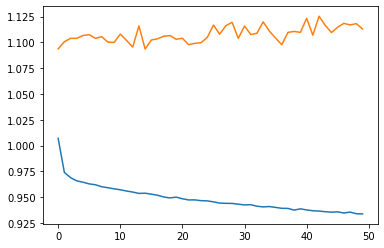

In [15]:
plt.plot(His2.history["loss"])
plt.plot(His2.history["val_loss"])

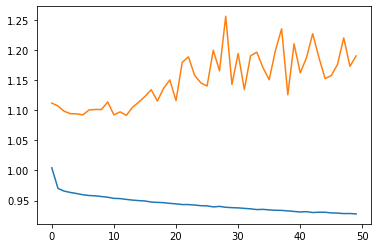

In [48]:
plt.plot(His3.history["loss"])
plt.plot(His3.history["val_loss"])

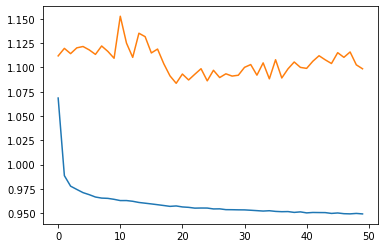

In [46]:
plt.plot(His1.history["loss"])
plt.plot(His1.history["val_loss"])

In [16]:
### Accuracy ###
pred = np.argmax(Mod1.predict(test), axis=-1)
n = pred.shape[0]

sum(pred == Y_test.iloc[:,0]) / n

0.37005832793259885

In [17]:
pred.shape

(1543,)

In [18]:
pred == 1

array([False, False, False, ..., False, False, False])

In [50]:
### Accuracy ###
pred = np.argmax(Mod2.predict(test), axis=-1)
n = pred.shape[0]

sum(pred == Y_test.iloc[:,0]) / n

0.37005832793259885

In [1]:
### Accuracy ###
pred = np.argmax(Mod3.predict(test), axis=-1)
n = pred.shape[0]

sum(pred == Y_test.iloc[:,0]) / n

NameError: name 'np' is not defined

In [54]:
import sklearn
from sklearn.metrics import roc_auc_score

In [55]:
pred = Mod1.predict(test)
roc_auc_score(pd.get_dummies(Y_test), pred, multi_class="ovr")

0.5570072097420699

In [56]:
pred = Mod2.predict(test)
roc_auc_score(pd.get_dummies(Y_test), pred, multi_class="ovr")

0.545774843339723

In [57]:
pred = Mod3.predict(test)
roc_auc_score(pd.get_dummies(Y_test), pred, multi_class="ovr")

0.5451939332823635